In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\abipr\Downloads\archive (6)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [13]:
df.isnull()
                

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
{df.shape}

{(7032, 21)}

In [17]:
df.dropna(inplace=True)

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


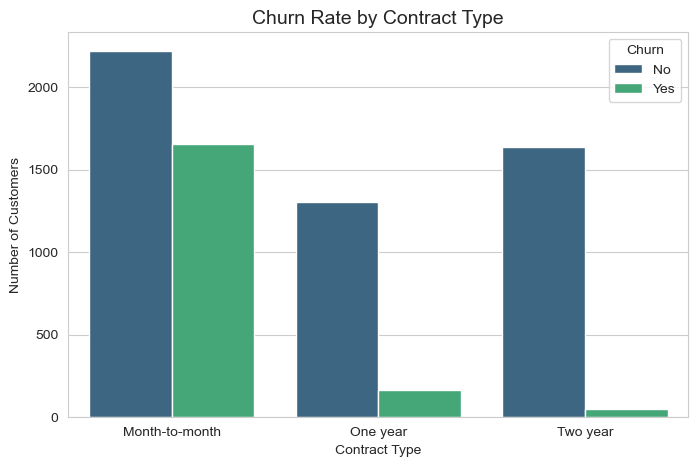

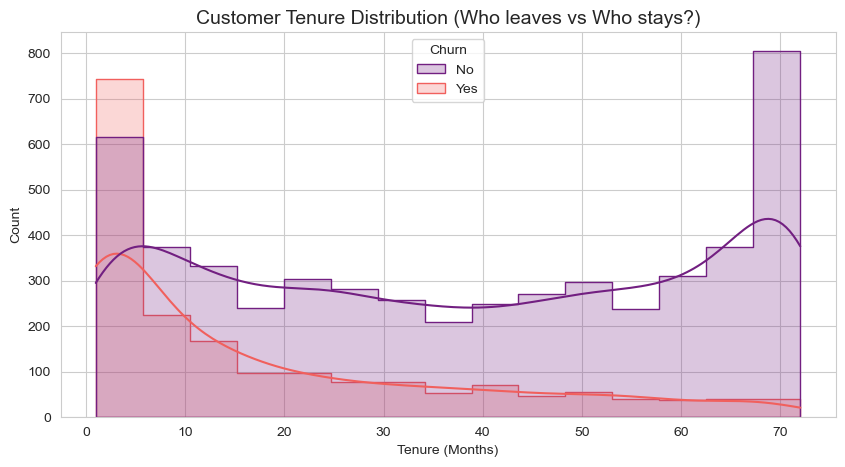

C:\Users\abipr\AppData\Local\Temp\ipykernel_17808\1070435905.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')


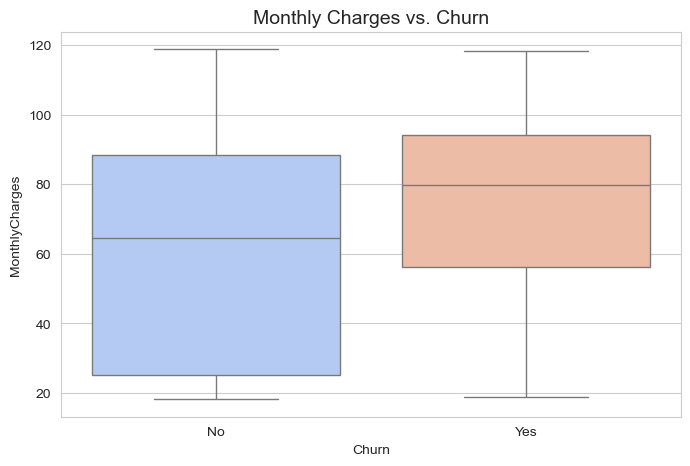

In [26]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Rate by Contract Type', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element="step", palette='magma')
plt.title('Customer Tenure Distribution (Who leaves vs Who stays?)', fontsize=14)
plt.xlabel('Tenure (Months)')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs. Churn', fontsize=14)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

df_model = pd.get_dummies(df, drop_first=True)

X = df_model.drop('Churn', axis=1) # The data used to predict
y = df_model['Churn']              # The answer key

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Prepared!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Data Prepared!
Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)


Model Accuracy: 78.75%

--- Detailed Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



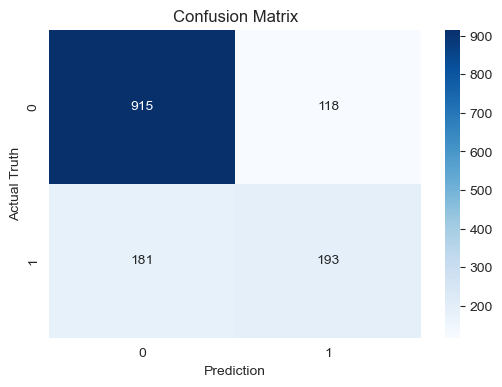

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Truth')
plt.xlabel('Prediction')
plt.show()

In [32]:
new_customer = pd.DataFrame({
    'tenure': [1],              # New customer (1 month)
    'MonthlyCharges': [70.0],   # Paying $70/month
    'TotalCharges': [70.0],
    'Gender_Male': [1],         # Male
    'Partner_Yes': [0],         # Single
    'Dependents_Yes': [0],      # No kids
    'PhoneService_Yes': [1],
    'MultipleLines_No phone service': [0],
    'MultipleLines_Yes': [0],
    'InternetService_Fiber optic': [1], # Fiber optic (usually higher churn)
    'InternetService_No': [0],
    'OnlineSecurity_No internet service': [0],
    'OnlineSecurity_Yes': [0],
    'OnlineBackup_No internet service': [0],
    'OnlineBackup_Yes': [0],
    'DeviceProtection_No internet service': [0],
    'DeviceProtection_Yes': [0],
    'TechSupport_No internet service': [0],
    'TechSupport_Yes': [0],
    'StreamingTV_No internet service': [0],
    'StreamingTV_Yes': [0],
    'StreamingMovies_No internet service': [0],
    'StreamingMovies_Yes': [0],
    'Contract_One year': [0],
    'Contract_Two year': [0],   # Month-to-month contract (High Risk!)
    'PaperlessBilling_Yes': [1],
    'PaymentMethod_Credit card (automatic)': [0],
    'PaymentMethod_Electronic check': [1], # Electronic check (High Risk)
    'PaymentMethod_Mailed check': [0]
})

new_customer = new_customer.reindex(columns=X.columns, fill_value=0)

new_customer_scaled = scaler.transform(new_customer)

prediction = model.predict(new_customer_scaled)
probability = model.predict_proba(new_customer_scaled)

print(f"Prediction: {'Churn (Risk)' if prediction[0] == 1 else 'Stay (Safe)'}")
print(f"Confidence: {probability[0][1]:.2%} chance of leaving")

Prediction: Churn (Risk)
Confidence: 69.56% chance of leaving


In [33]:
import joblib

# Save the model and the scaler to files
joblib.dump(model, 'churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved successfully!")

Model and Scaler saved successfully!
